In [87]:
import pickle
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt

In [4]:
kal = pickle.load(open('./kalman.txt', 'rb'))

In [28]:
kal.shape

(10, 8)

In [29]:
kal_traj = kal[trial, target][-1]

In [33]:
kal[0,0].shape

(631, 3)

In [5]:
monkey =io.loadmat('./data/CCN/monkeydata.mat')

In [10]:
monkey_data=monkey['trial']

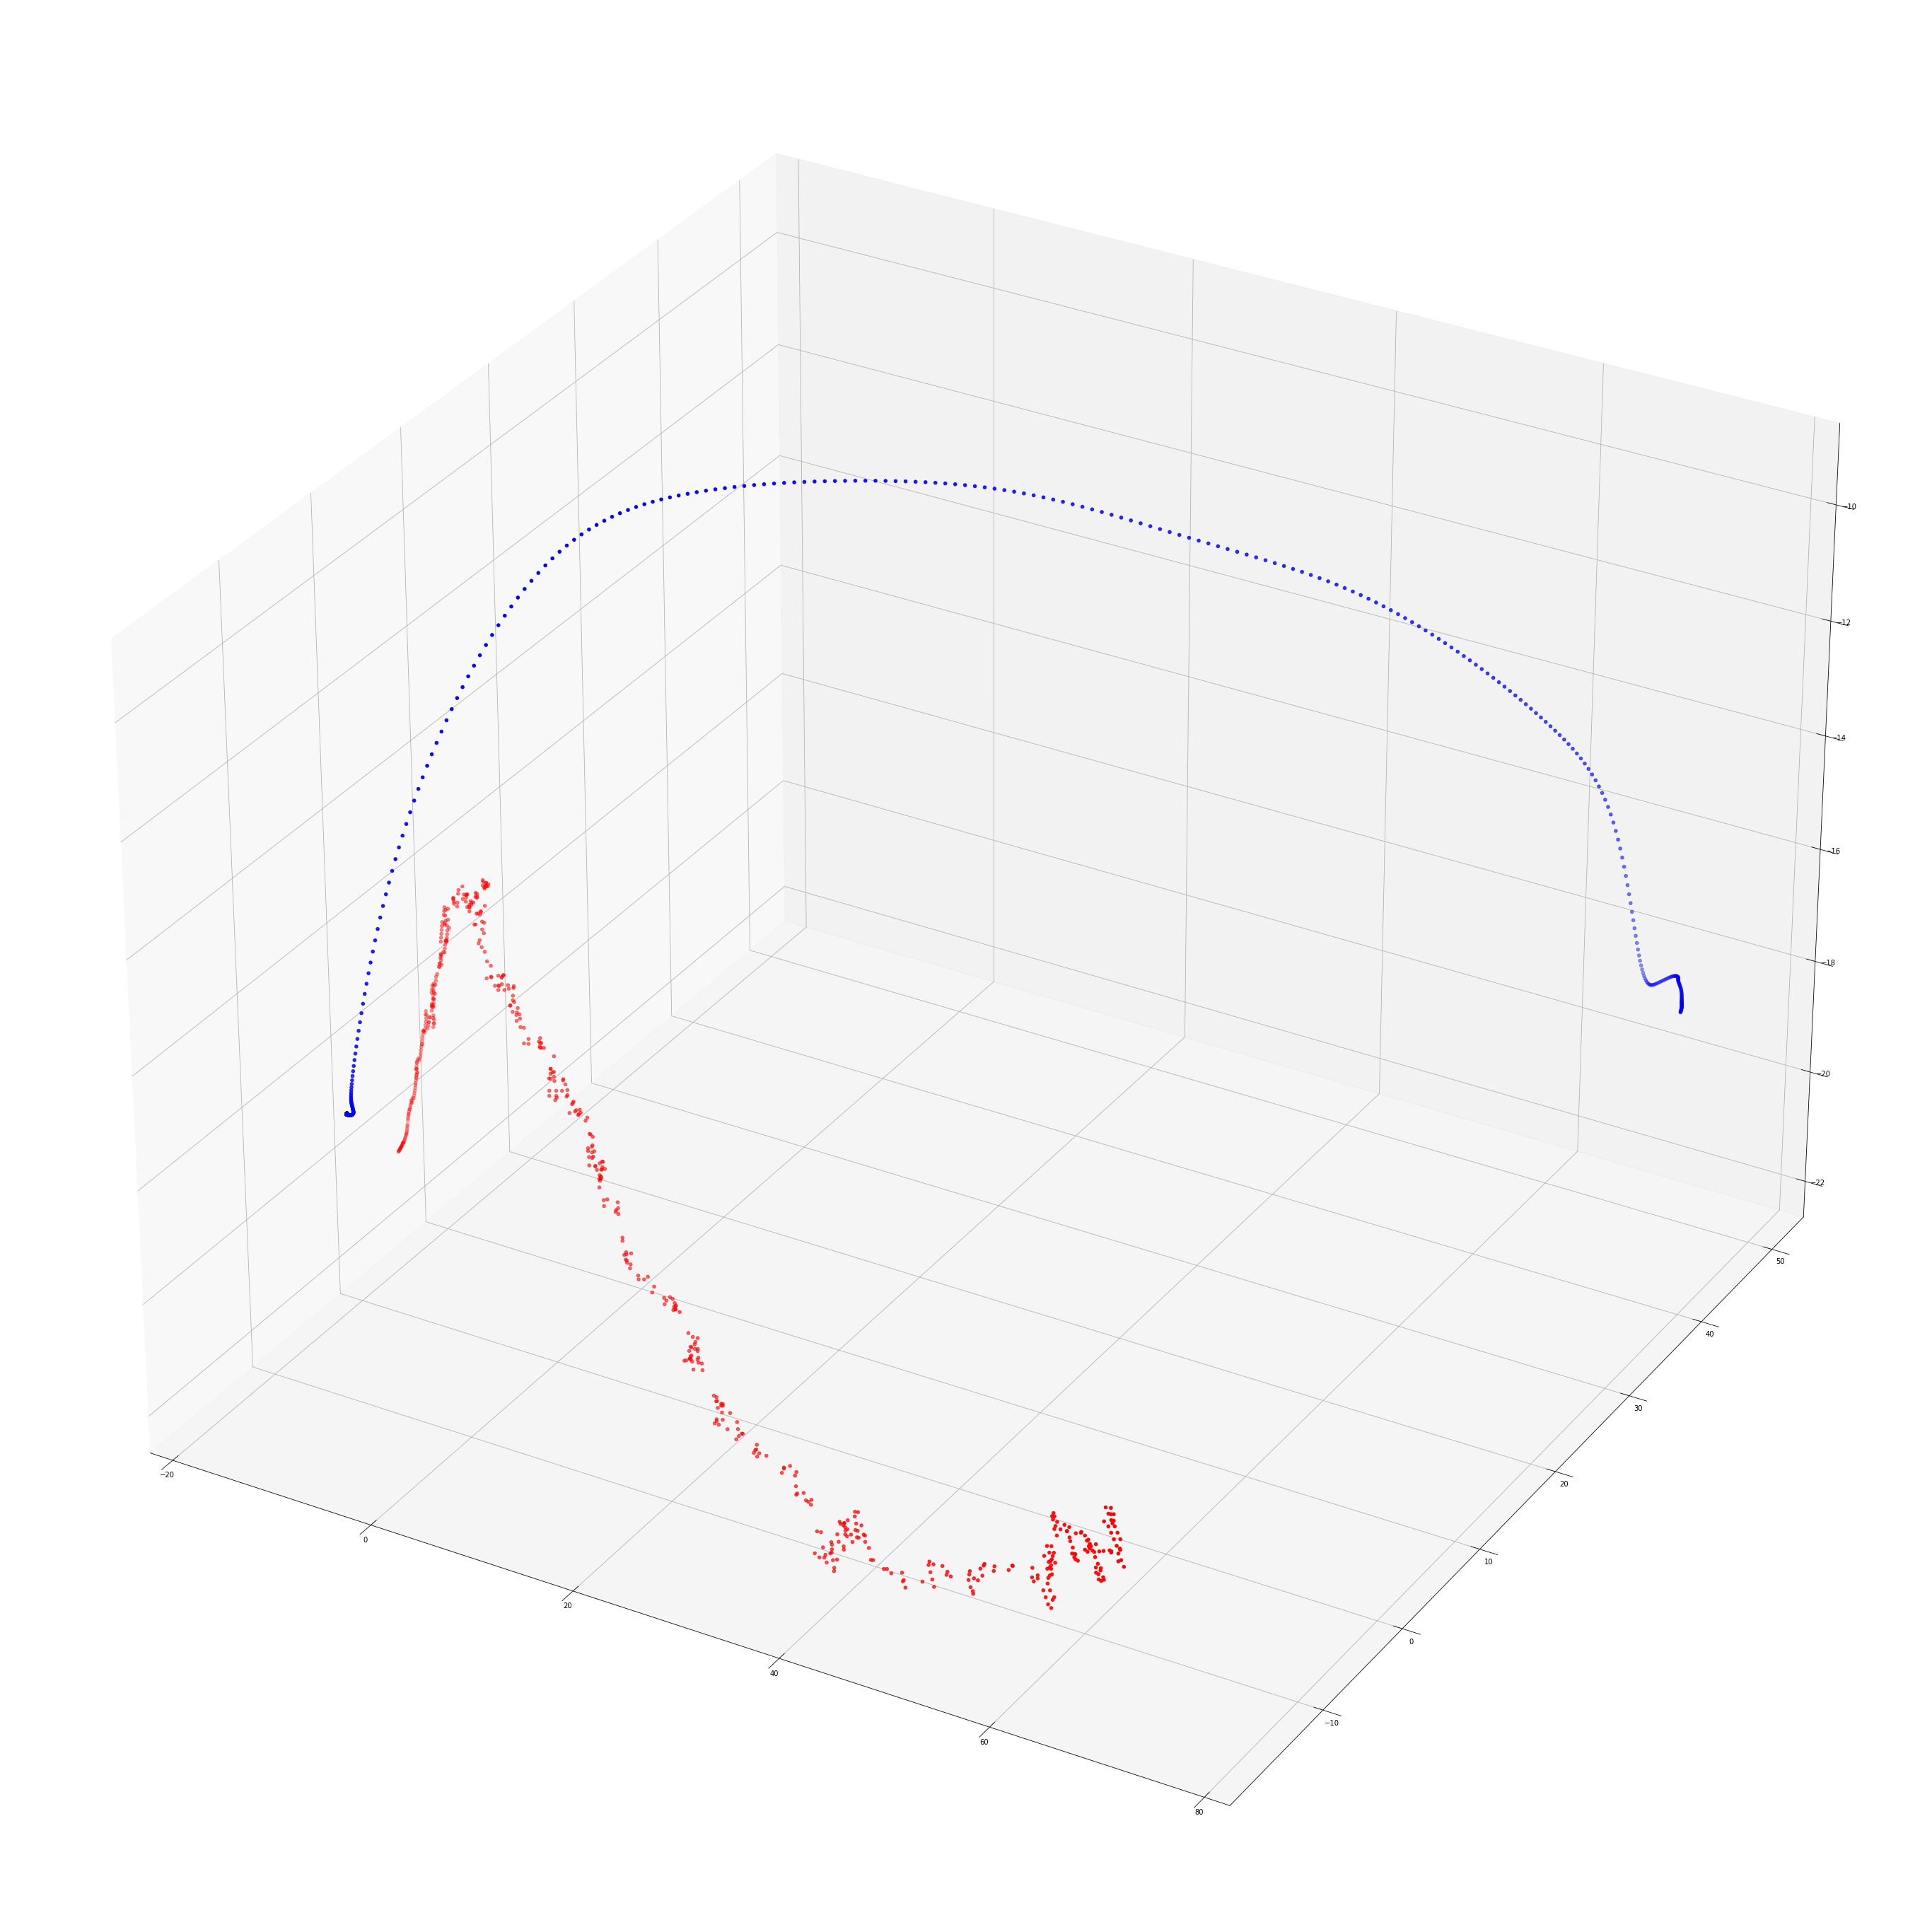

In [50]:
fig, ax = plt.subplots(figsize=(50,50), subplot_kw={"projection": "3d"})


arm_traj = monkey_data[0, 0][-1]
ax.scatter(arm_traj[0,:], arm_traj[1,:], arm_traj[2,:], color='blue')

kal_traj = kal[0, 0]
ax.scatter(kal_traj[:,0], kal_traj[:,1], kal_traj[:,2], color='red')
        

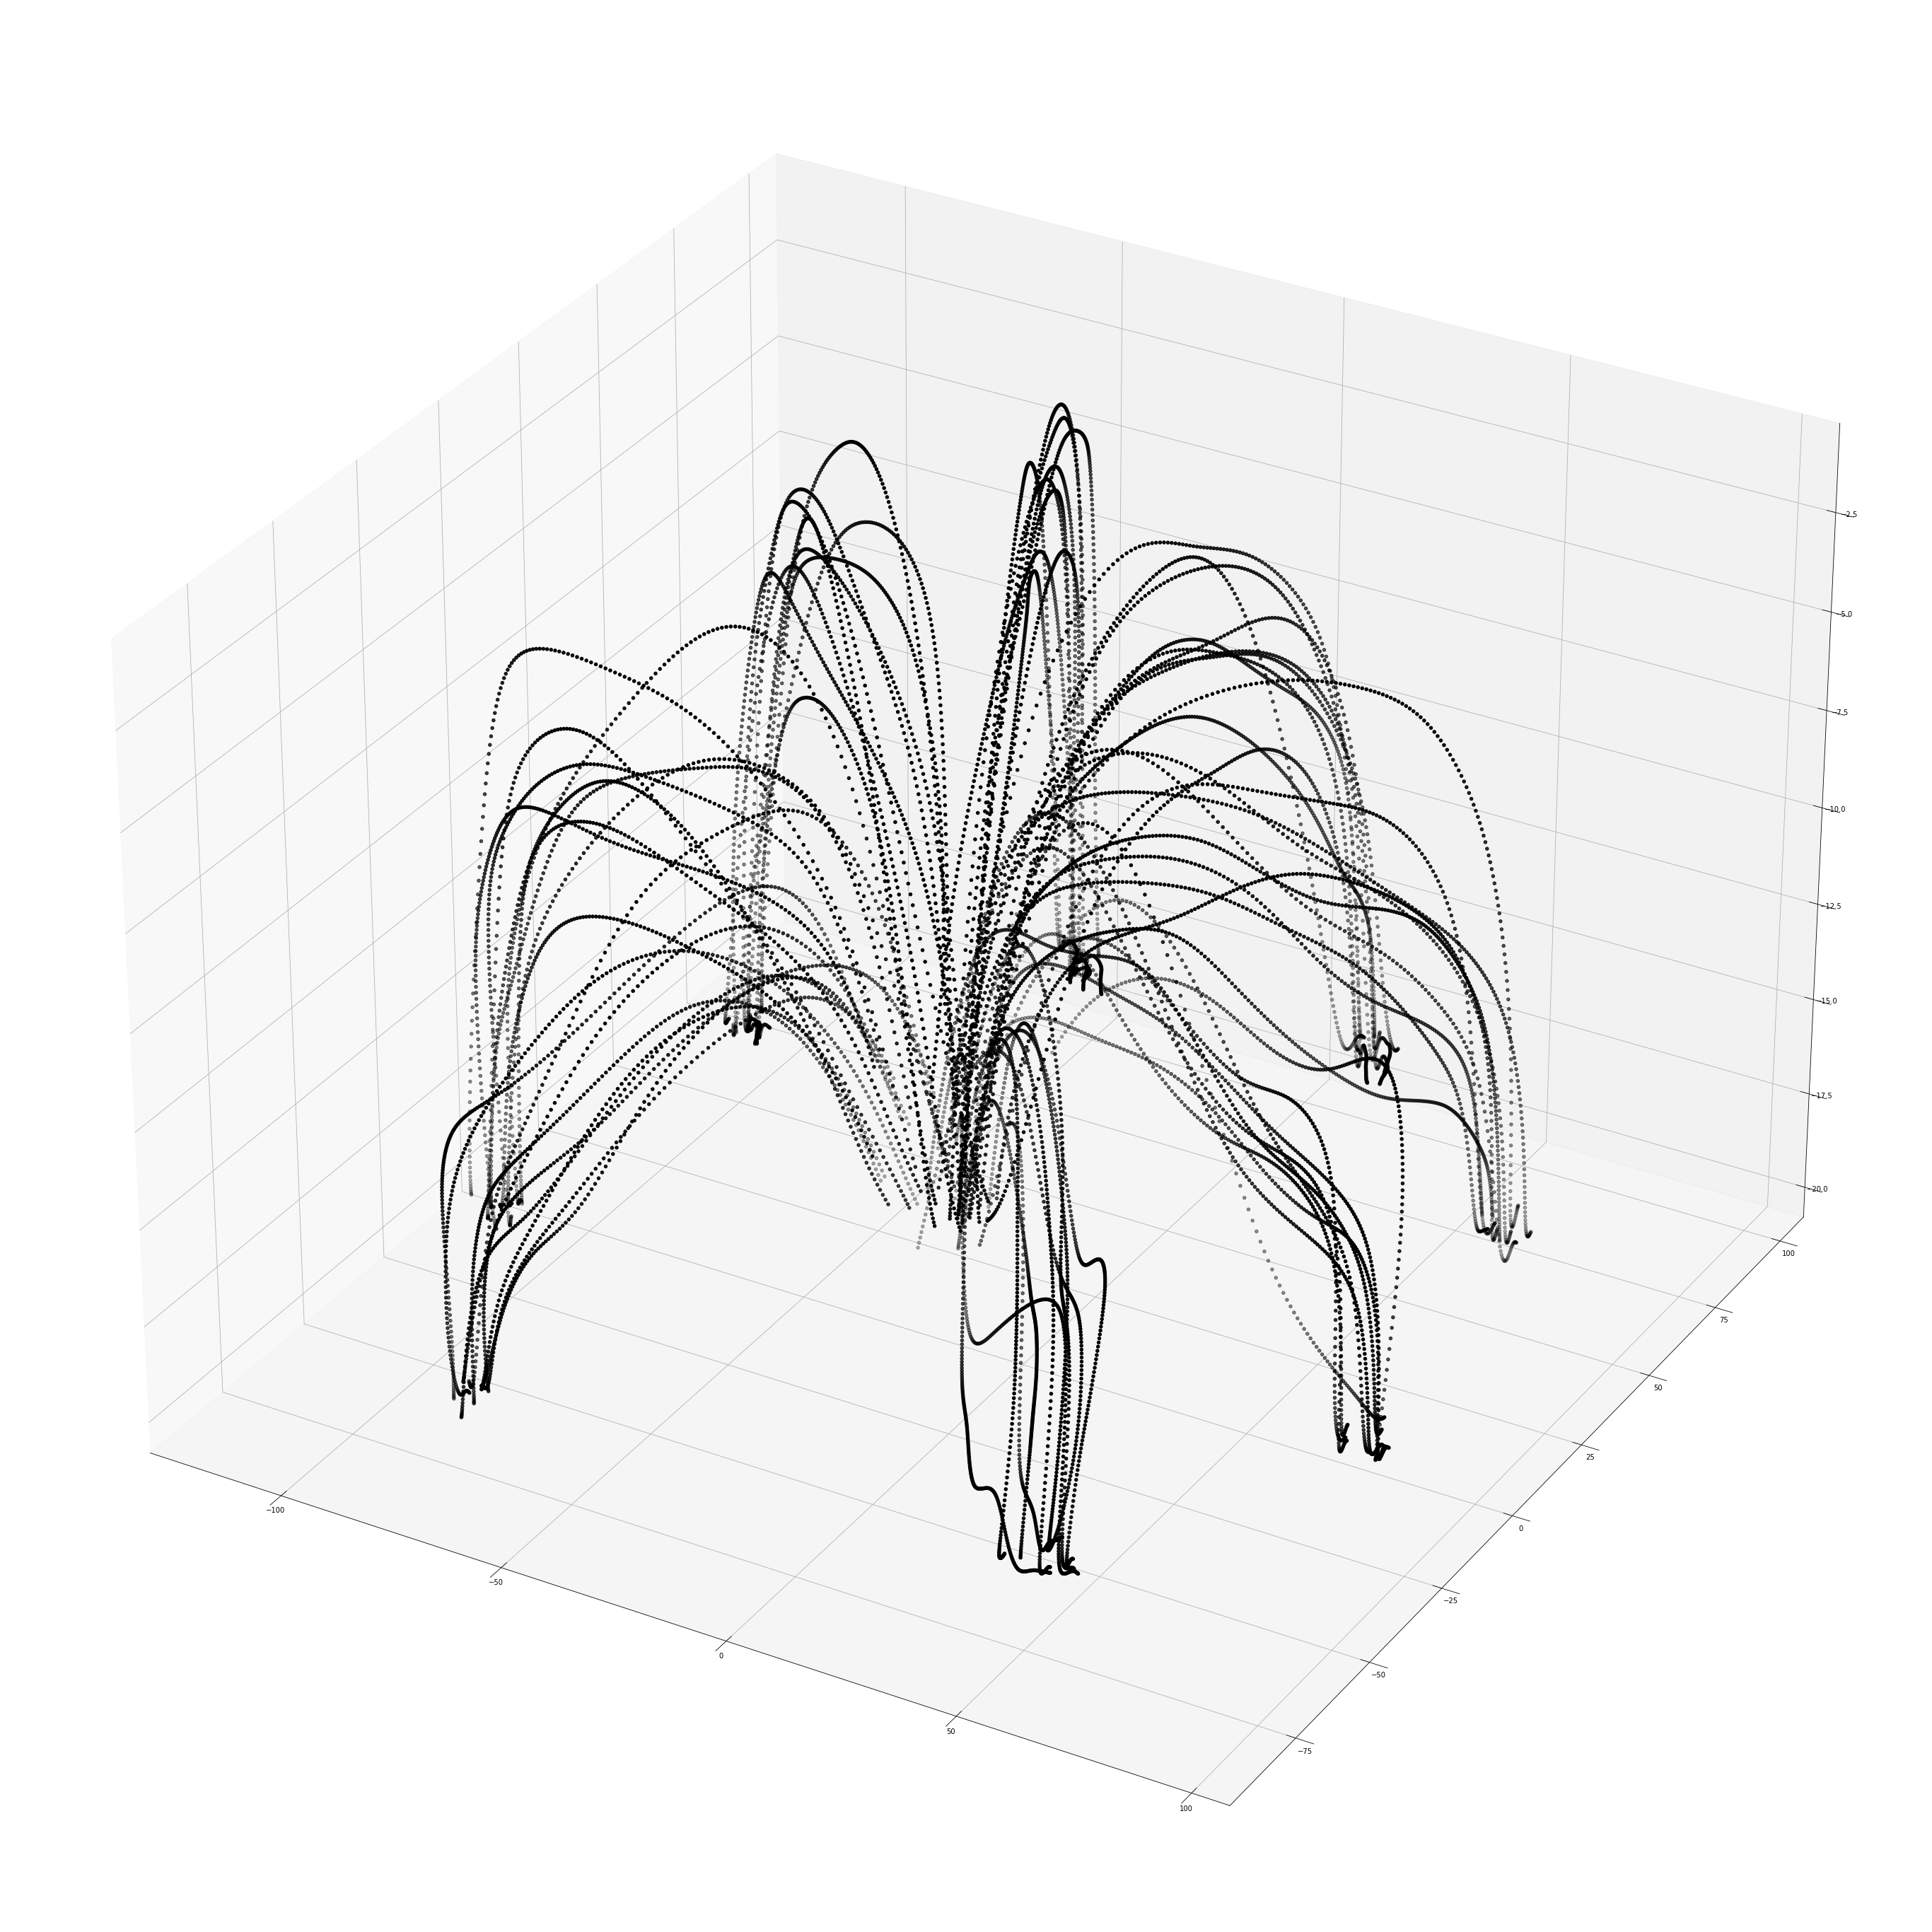

In [109]:
fig, ax = plt.subplots(figsize=(50,50), subplot_kw={"projection": "3d"})

for trial in range(10):
    for target in range(8):
        arm_traj = monkey_data[trial, target][-1]
        ax.scatter(arm_traj[0,350:-100], arm_traj[1,350:-100], arm_traj[2,350:-100], color='black')
        
#         kal_traj = kal[trial, target]
#         ax.scatter(kal_traj[:,0], kal_traj[:,1], kal_traj[:,2], color='red')

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
monkey_data[0,0][-1].shape

(3, 672)

In [79]:
x = monkey_data[0,0][-1][0]
y = monkey_data[0,0][-1][1]
z = monkey_data[0,0][-1][2]

In [80]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_z = StandardScaler()

scaler_x.fit(x.reshape(-1, 1))
scaler_y.fit(y.reshape(-1, 1))
scaler_z.fit(z.reshape(-1, 1))

x = scaler_x.transform(x.reshape(-1, 1))
y = scaler_y.transform(y.reshape(-1, 1))
z = scaler_z.transform(z.reshape(-1, 1))

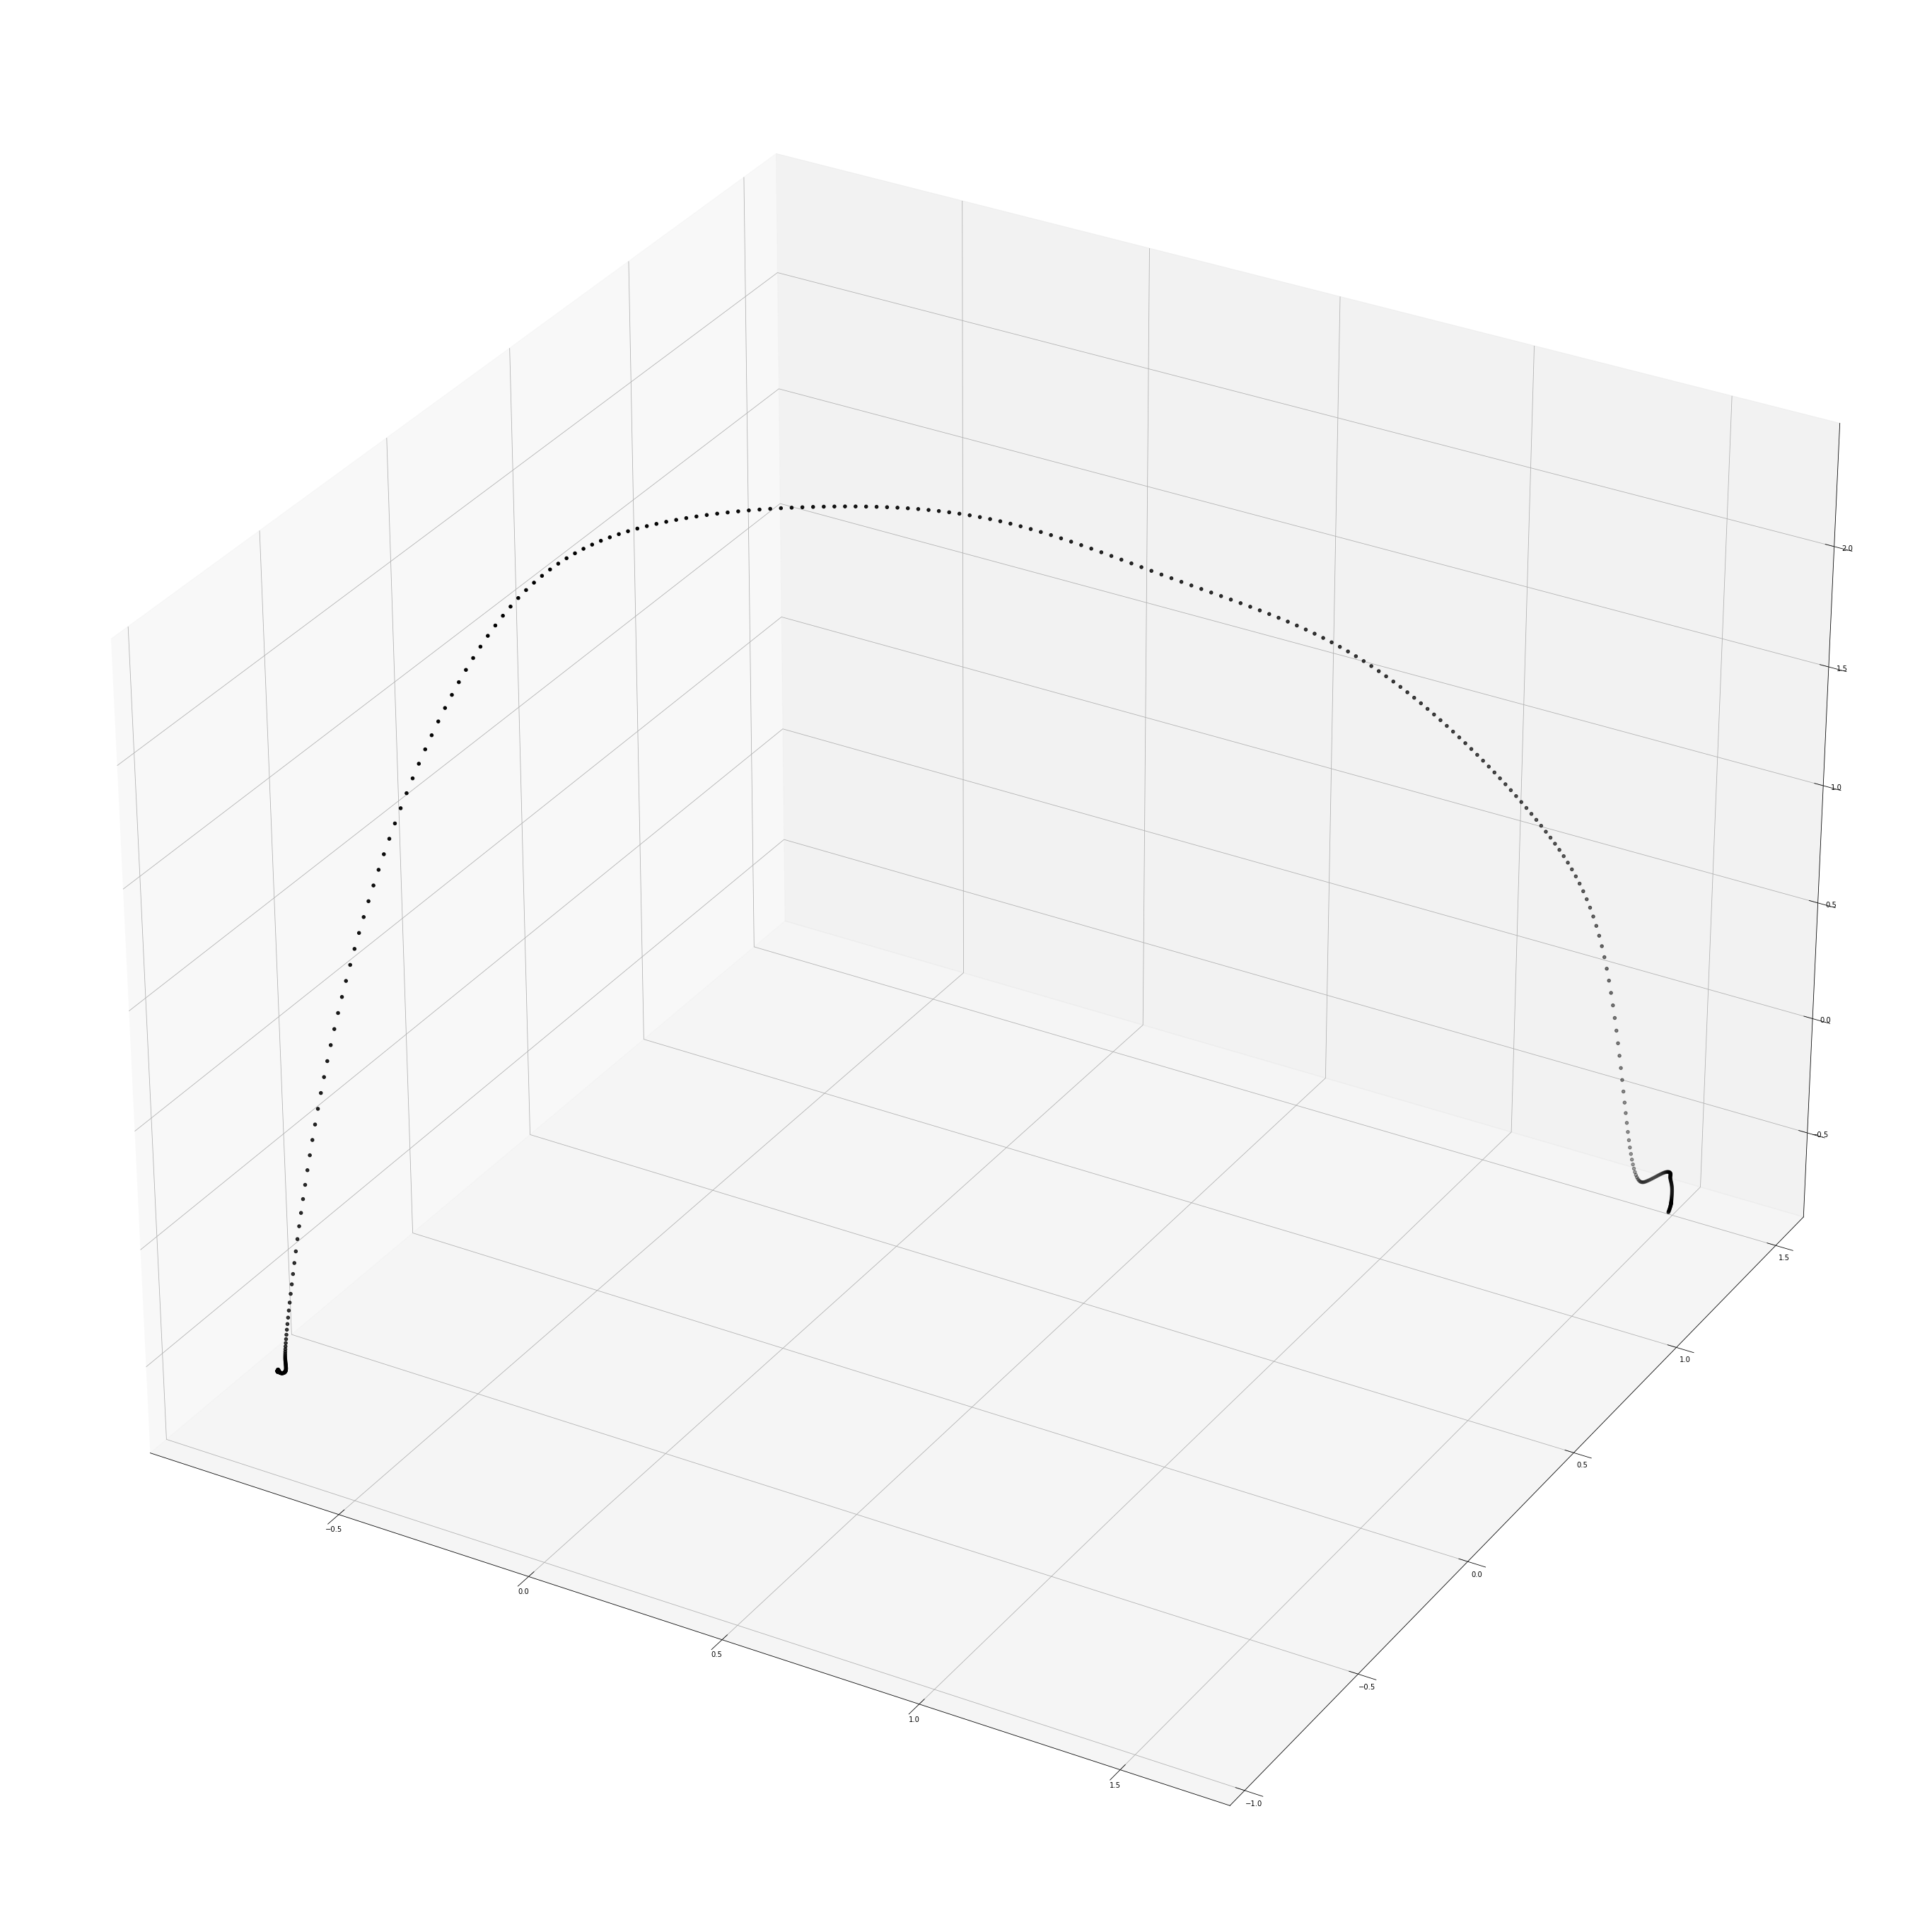

In [110]:
fig, ax = plt.subplots(figsize=(50,50), subplot_kw={"projection": "3d"})
ax.scatter(x, y, z, color='black')

In [112]:
monkey_data[0,1][1].shape

(98, 615)

In [104]:
im_o = monkey_data[0,0][1]

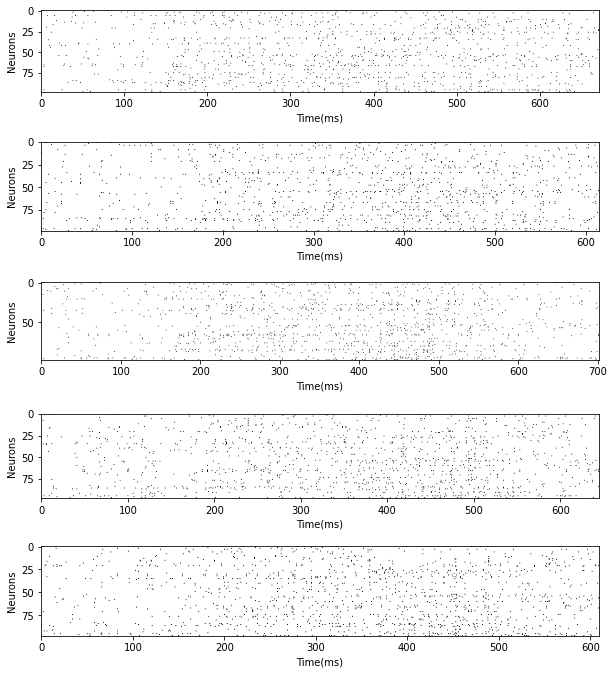

In [117]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))


for i in range(5):
    axes[i].imshow(monkey_data[0,i][1], cmap='binary')
    axes[i].set_xlabel('Time(ms)')
    axes[i].set_ylabel('Neurons')